In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_forInt import *
from PossibleFunctions import *
from random import uniform
import random
import matplotlib
#%matplotlib auto

In [2]:
originG = [0,0,0] # the global origin
thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
origin1 = [-32.075,-128,0] #x,y (ellipse1)
origin2 = [64.15-32.075,-128,0] #x,y (ellipse2)
origin3 = [-32.075,128,0] #x,y (ellipse3)
origin4 = [64.15-32.075,128,0] #x,y  (ellipse4)
#origin5 = [128.3,-120.501,0] # (ellipse5) changed for 2D
origin5 = [128.3-32.075,-128,0]
#origin6 = [128.3,120.501,0] # (ellipse6) changed for 2D
origin6 = [128.3-32.075,128,0]
origin7 = [160.375-32.075,-7.5,40]
#origin8 = [-64.15,-120.501,0] changed for 2D
#origin9 = [-64.15,120.501,0] changed for 2D
origin8 = [-64.15-32.075,-128,0] 
origin9 = [-64.15-32.075,128,0]
origin10 = [-96.225-32.075,7.5,-40]

originpolar1 = [-128.3,0.0,0.0]
originpolar2 = [-64.15,0.0,0.0]
originpolar3 = [64.15,0.0,0.0]
originpolar4 = [128.3,0.0,0.0]

thet = [0,0,0] #A
thet5 = [0,0,-.1164] 
thet6 = [0,0,.1164] #testing
thet7 = [0,.319422,1.3106]
thet10 = [0,.310422,-1.3106]


coeffellipse7 = [164.645,99.8,130.95]
coeffellipse56 = [248.39,256.65,64.58]  #for ellipses 5&6
coeffellipse = [263.9,256,64.15] #for center ellipses
coeffmirr = [31.75,25.4,19.05]
coeffpolar = [32.075,32.075,0] #for polarizers (2d circle)

#polarizer1
xp1,yp1,zp1 = polarizer(originpolar1,coeffpolar,0.0)
#polarizer2
xp2,yp2,zp2 = polarizer(originpolar2,coeffpolar,0.0)
#polarizer3
xp3,yp3,zp3 = polarizer(originpolar3,coeffpolar,0.0)
#polarizer4
xp4,yp4,zp4 = polarizer(originpolar4,coeffpolar,0.0)

#CEBS
xC,yC1,yCn,zC = CEBS(coeffellipse,300) #center
xS,yS1,ySn,zS = CEBS(coeffellipse,300) #side

#E1
xC1,yC11,zC1 = SR2(32.07,xC,yC1,zC,originG)
xL1,yL1,zL1 = transformLG(xC1,yC11,zC1,origin1,thetG) 
#E2
xC2,yC12,zC2 = SR2(32.07,xC,yC1,zC,originG)
xL2,yL2,zL2 = transformLG(xC2,yC12,zC2,origin2,thetG) 
#E3
xC3,yCn3,zC3 = SR2(32.07,xC,yCn,zC,originG)
xL3,yL3,zL3 = transformLG(xC3,yCn3,zC3,origin3,thetG)
#E4
xC4,yCn4,zC4 = SR2(32.07,xC,yCn,zC,originG)
xL4,yL4,zL4 = transformLG(xC4,yCn4,zC4,origin4,thetG)
#E5
xS5,yS15,zS5 = transformLG(xS,yS1,zS,origin5,thet5)
xL5,yL5,zL5 = SR2(32.07,xS5,yS15,zS5,origin5)
#E6
xS6,ySn6,zS6 = transformLG(xS,ySn,zS,origin6,thet6)
xL6,yL6,zL6 = SR2(32.07,xS6,ySn6,zS6,origin6)
#E8
xS8,yS18,zS8 = transformLG(xS,yS1,zS,origin8,thet6)
xL8,yL8,zL8 = SR2(32.07,xS8,yS18,zS8,origin8)
#E9
xS9,ySn9,zS9 = transformLG(xS,ySn,zS,origin9,thet5)
xL9,yL9,zL9 = SR2(32.07,xS9,ySn9,zS9,origin9)
#mirror
xM,yM,zM = mirror(originG,coeffmirr,0.0)

#point (global)
sourcepoint = [-160.375,-113,0] #global

#angle (global)
rand = float(random.randrange(32000,96000))
angle = rand/1000
v = [angle,251,0] #random angle
x,y,z = ML(sourcepoint,v,250)

#angle limits
v1 = [32.075,251,0] #edge 1
v2 = [96.225,251,0] #edge 2
x1,y1,z1 = ML(sourcepoint,v1,200)
x2,y2,z2 = ML(sourcepoint,v2,200)

print('Continue')
Ri = CreateRay() #original ray (SHOULD REMAIN UNCHANGED)
print('Input ray: ', Ri) 
Ray_RP1 = IntPolR2(Ri,coeffpolar,originpolar1,np.pi/4)
Ray_TP1 = IntPolT2(Ri,coeffpolar,originpolar1,np.pi/4) #P1
Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56) #E8
Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,np.pi/2) #P2
Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse) #E3
Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse) #off E4
Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,np.pi) #P3
Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56)
Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,np.pi/4)
Ray_E7 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7)
print('Tp4: ', Ray_TP4)
print('Output: ', Ray_E7)
E72 = TTTT(Ri,np.pi/4,np.pi/2,np.pi,np.pi/4)
Ray_E72 = ReflEll(E72,thet7,origin7,coeffellipse7)
print('Tp42: ',E72)
print('output ray: ', Ray_E72)

Continue
Input ray:  [4.065204718193108, 1.0, [-160.375, -113, 0], [69.846, 251, 0], 0]
Tp4:  [-0.7853981633974483, 0.50611856416859513, (121.44912197281377, 0.0, 0.0), [0.24755754043985026, -0.96887319302959984, 0.0], 742.67897210911474]
Output:  [2.356194490192345, 0.50611856416859513, [154.26464839921033, -128.43108641812978, -7.1054273576010019e-15], [0.099897359389364948, -0.025485925638957137, 0.99467129504241636], 960.17619196518172]
Tp42:  [-0.7853981633974483, 0.50611856416859513, (121.44912197281377, 0.0, 0.0), [0.24755754043985026, -0.96887319302959984, 0.0], 742.67897210911474]
output ray:  [2.356194490192345, 0.50611856416859513, [154.26464839921033, -128.43108641812978, -7.1054273576010019e-15], [0.099897359389364948, -0.025485925638957137, 0.99467129504241636], 960.17619196518172]


In [3]:
xi,yi,zi = ML(Ri[2],Ri[3],150) #original ray
xR1,yR1,zR1 = ML(Ray_RP1[2],Ray_RP1[3],150) #reflected off p1
xT1,yT1,zT1 = ML(Ray_TP1[2],Ray_TP1[3],150) #transmitted through p1
xE8,yE8,zE8 = ML(Ray_E8[2],Ray_E8[3],150) #reflected off E8
xT2,yT2,zT2 = ML(Ray_TP2[2],Ray_TP2[3],150) #transmitted through p2
xE3,yE3,zE3 = ML(Ray_E3[2],Ray_E3[3],150) #reflected off E3
xM0,yM0,zM0 = ML(Ray_M0[2], Ray_M0[3], 150) #reflected off mirror
xE4,yE4,zE4 = ML(Ray_E4[2],Ray_E4[3],150) #reflected off E4
xT3,yT3,zT3 = ML(Ray_TP3[2],Ray_TP3[3],150) #through p3
xE5,yE5,zE5 = ML(Ray_E5[2],Ray_E5[3],150) #reflected off E5
xT4,yT4,zT4 = ML(Ray_TP4[2], Ray_TP4[3],150) #through p4
xE7,yE7,zE7 = ML(Ray_E7[2],Ray_E7[3],150)


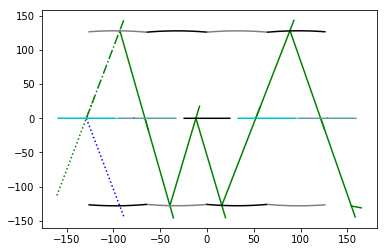

In [4]:
#NOW ADD THE E7 AND SEE WHAT HAPPENS???? urgh. 
#problem of a small intensity (square root going to zero and being invalid)

pl.plot(xi,yi,color = 'green', linestyle= ':')
pl.plot(xR1,yR1,color = 'blue', linestyle = ':') #reflected
pl.plot(xT1,yT1,color = 'green', linestyle = '-.') #transmitted through P1
pl.plot(xE8,yE8,color = 'green') #off of E8
pl.plot(xT2,yT2,color = 'green') #transmitted through P2
pl.plot(xE3,yE3,color = 'green') #off E3
pl.plot(xM0,yM0, color = 'green')
pl.plot(xE4,yE4,color = 'green')
pl.plot(xT3,yT3,color = 'green')
pl.plot(xE5,yE5,color = 'green')
pl.plot(xT4,yT4, color = 'green')
pl.plot(xE7,yE7,color = 'green')


pl.plot(xL1,yL1, color = 'black')
pl.plot(xL2,yL2, color = 'grey')
pl.plot(xL3,yL3, color = 'grey')
pl.plot(xL4,yL4, color = 'black')
pl.plot(xL5,yL5, color = 'black')
pl.plot(xL6,yL6, color = 'grey')
pl.plot(xL8,yL8, color = 'grey')
pl.plot(xL9,yL9, color = 'black')
pl.plot(xM,yM, color = 'black')
pl.plot(xp1,yp1,color = 'c')
pl.plot(xp2,yp2,color = 'cadetblue')
pl.plot(xp3,yp3,color = 'c')
pl.plot(xp4,yp4,color = 'cadetblue')
#pl.plot(x1,y1, color = 'lightblue')
pl.show()

In [5]:
Ri = CreateRay()
p1 = np.pi/4
p2 = np.pi/2
p3 = np.pi
p4 = np.pi/4

R1 = TTTT(Ri,p1,p2,p3,p4)
R2 = RRRR(Ri,p1,p2,p3,p4)
Ray_E71 = ReflEll(R1,thet7,origin7,coeffellipse7)
Ray_E72 = ReflEll(R2,thet7,origin7,coeffellipse7)

xE71,yE71,zE71 = ML(Ray_E71[2],Ray_E7[3],150)
xE72,yE72,zE72 = ML(Ray_E72[2],Ray_E7[3],150)

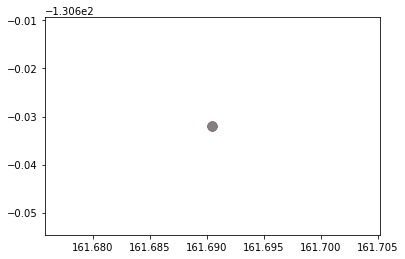

[969.68252739950753, 969.68252739950753, 969.68252739950731, 969.68252739950753, 969.68252739950753, 969.68252739950742, 969.68252739950753, 969.68252739950742]


In [18]:
A = detectyneg(Ri,p1,p2,p3,p4)
points = []
vects = []
dist = []
for i in range(8):
    points.append(A[i][2])
    vects.append(A[i][3])
    dist.append(A[i][4])
B = PLINTz(80,points,vects)
for i in range (8):
    pl.scatter(B[i][0],B[i][1],B[i][2])
pl.show()
print(dist)
#yay it reaches the detector